In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import scanpy as sc
import pegasus as pg
import pegasusio as io
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import scipy.stats as st
import squidpy as sq
import seaborn as sns
import os
import glob
from utils.lists import *
from utils.plot_utils import *
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import rc_context
import itertools
import random
import matplotlib.cm
import glob
from collections import Counter, OrderedDict
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

import spatialdata as sd
import spatialdata_plot
import spatialdata_io
from spatialdata import bounding_box_query

2024-09-12 19:36:51.057702: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 19:36:51.153965: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-12 19:36:51.157206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-12 19:36:51.157222: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Fig. 4a SST decreased communication barplot

In [2]:
df = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/C2C/output_differential.txt')

In [4]:
df.name = ['ASC','END','MG','ODC','OPC','KCNG1','LAMP5','PVALB','SST','VIP','CUX2','FEZF2','OPRK1','RORB']

In [5]:
new_order = ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','ODC','OPC','END','ASC','MG']

In [6]:
df = df.set_index('name').loc[new_order]

In [7]:
data_reshaped = df.value.values.reshape(1,-1)


Text(0.5, 0, 'Differential Output')

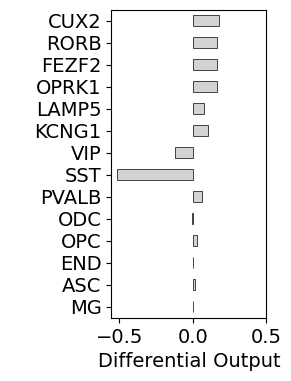

In [9]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size']= '14'

#fig, ax = plt.subplots(figsize=(2,4))

df[::-1].plot.barh(legend=None,figsize=(2,4),color='lightgrey',edgecolor='k',lw=0.5)

plt.xticks([-0.5,0,0.5])
plt.ylabel(' ')
plt.xlabel('Differential Output',fontsize=14)

# Fig. 4c snXenium SST PTSD vs CON expression

In [4]:
data = sc.read_h5ad('/gpfs/gibbs/pi/girgenti/ah2428/xenium/data_processed_resegment/snXenium.h5ad')
data_pg = MultimodalData(data)
pg.log_norm(data_pg,base_matrix='raw')

2024-09-12 19:30:36,650 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.11s.


In [5]:
con_cells = data.obs[data.obs.Condition=='CON'].index.values
ptsd_cells = data.obs[data.obs.Condition=='PTSD'].index.values
data_ptsd_con = data[np.append(con_cells,ptsd_cells),:]

In [6]:
df = snXenium_violin(data_ptsd_con,attrs=['SST'],groupby='celltype',hue='Condition')
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.reorder_categories(['EXC','INH','OLI','OPC','END','AST','MIC'])
x = pd.DataFrame(df.groupby(['label','Condition'])['SST'].mean())
x = x.loc[['EXC','INH','OLI','OPC','END','AST','MIC']]
x = x.reset_index()

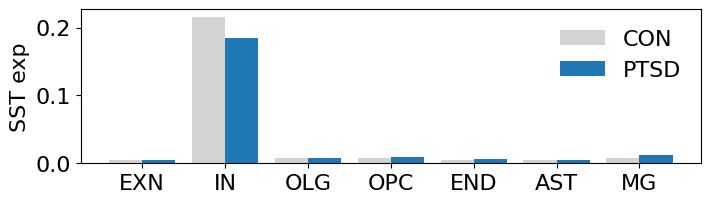

In [7]:
plt.rcParams['font.size']='16'
fig, ax = plt.subplots(figsize=(8,2))
ax.bar(np.arange(7),x[x.Condition=='CON'].SST.values,width=0.4,label='CON',color='lightgray')
ax.bar(np.arange(7)+0.4,x[x.Condition=='PTSD'].SST.values,width=0.4,label='PTSD',color='tab:blue')
ax.set_xticks(np.arange(7)+0.2,['EXN','IN','OLG','OPC','END','AST','MG'])
plt.legend(frameon=False)
plt.ylabel('SST exp')
plt.savefig('/home/ah2428/palmer_scratch/figs/fig4/SST_barplot.pdf',bbox_inches='tight',dpi=300)

# Fig. 4d snXenium CON SST Slide  

INFO     reading /gpfs/gibbs/pi/girgenti/ah2428/xenium/data/5638_resegment/outs/cell_feature_matrix.h5             


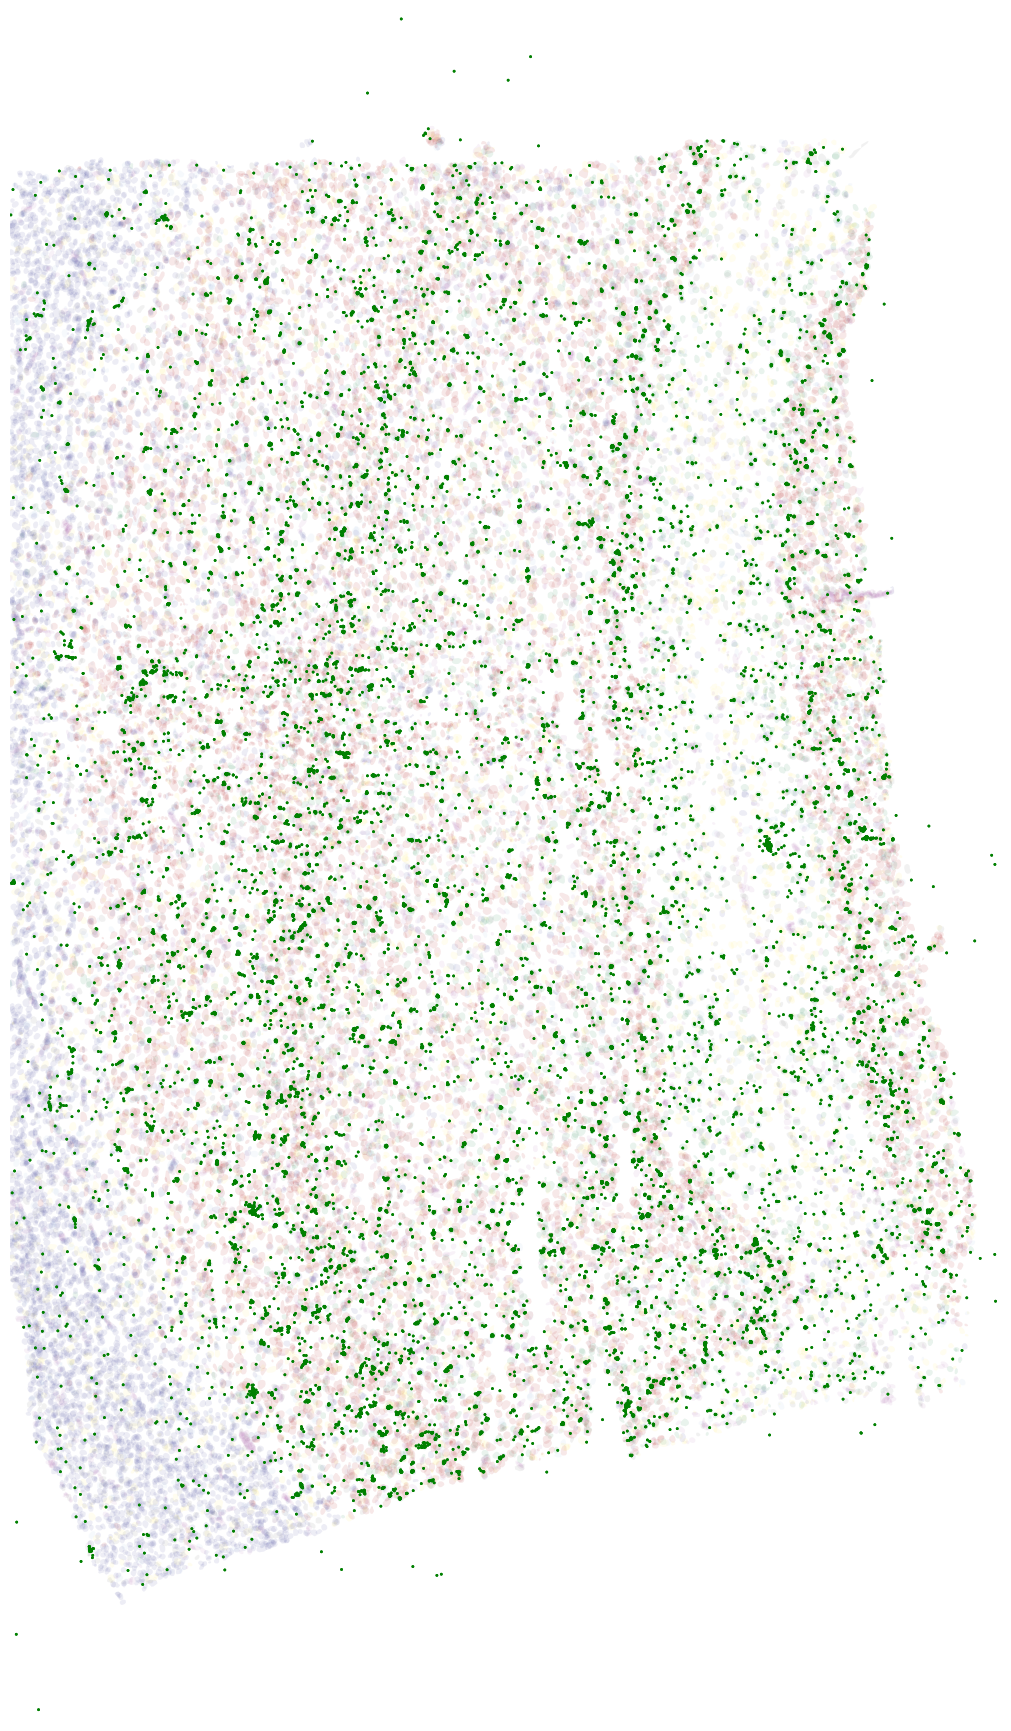

In [2]:
sdata = plot_xenium_slide('5638','SST','green','/home/ah2428/palmer_scratch/figs/fig4/')

In [3]:
sdata

SpatialData object with:
├── Images
│     ├── 'morphology_focus': MultiscaleSpatialImage[cyx] (1, 44227, 25627), (1, 22113, 12813), (1, 11056, 6406), (1, 5528, 3203), (1, 2764, 1601)
│     └── 'morphology_mip': MultiscaleSpatialImage[cyx] (1, 44227, 25627), (1, 22113, 12813), (1, 11056, 6406), (1, 5528, 3203), (1, 2764, 1601)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (44227, 25627), (22113, 12813), (11056, 6406), (5528, 3203), (2764, 1601)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (44227, 25627), (22113, 12813), (11056, 6406), (5528, 3203), (2764, 1601)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (37986, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (37986, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (37986, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (37986, 366)
with coordinate systems:
▸ 'global', with 

In [7]:
crop0 = lambda x: bounding_box_query(
    x,
    min_coordinate=[5000,15000],
    max_coordinate=[10000,20000],
    axes=("x", "y"),
    target_coordinate_system="global",
)
subset = crop0(sdata)

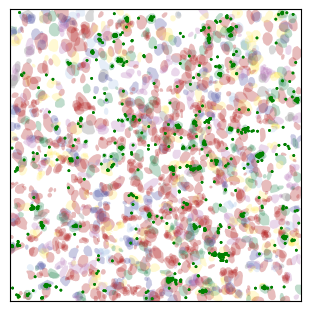

In [8]:
subset.pl.render_shapes("cell_boundaries",
                       color='celltype',
                       groups=['EXC','INH','OLI','OPC','END','AST','MIC'],
                       palette=['#b22222','#2E8B57','#5254a3','#aec7e8','#bc80bd','#ffed6f','#7f7f7f'],
                       scale=5, 
                       outline=False, 
                       fill_alpha=0.3).pl.render_points('transcripts',color='feature_name',groups='SST',palette='green',size=1).pl.show(figsize=(3,3))
plt.title('')
plt.legend('',frameon=False)
plt.title('')
plt.xticks([])
plt.yticks([])
plt.savefig('/home/ah2428/palmer_scratch/figs/fig4/SST_CON_inset.pdf',bbox_inches='tight',dpi=300)
plt.show()

# Fig. 4e snXenium PTSD SST Slide

INFO     reading /gpfs/gibbs/pi/girgenti/ah2428/xenium/data/5173_resegment/outs/cell_feature_matrix.h5             


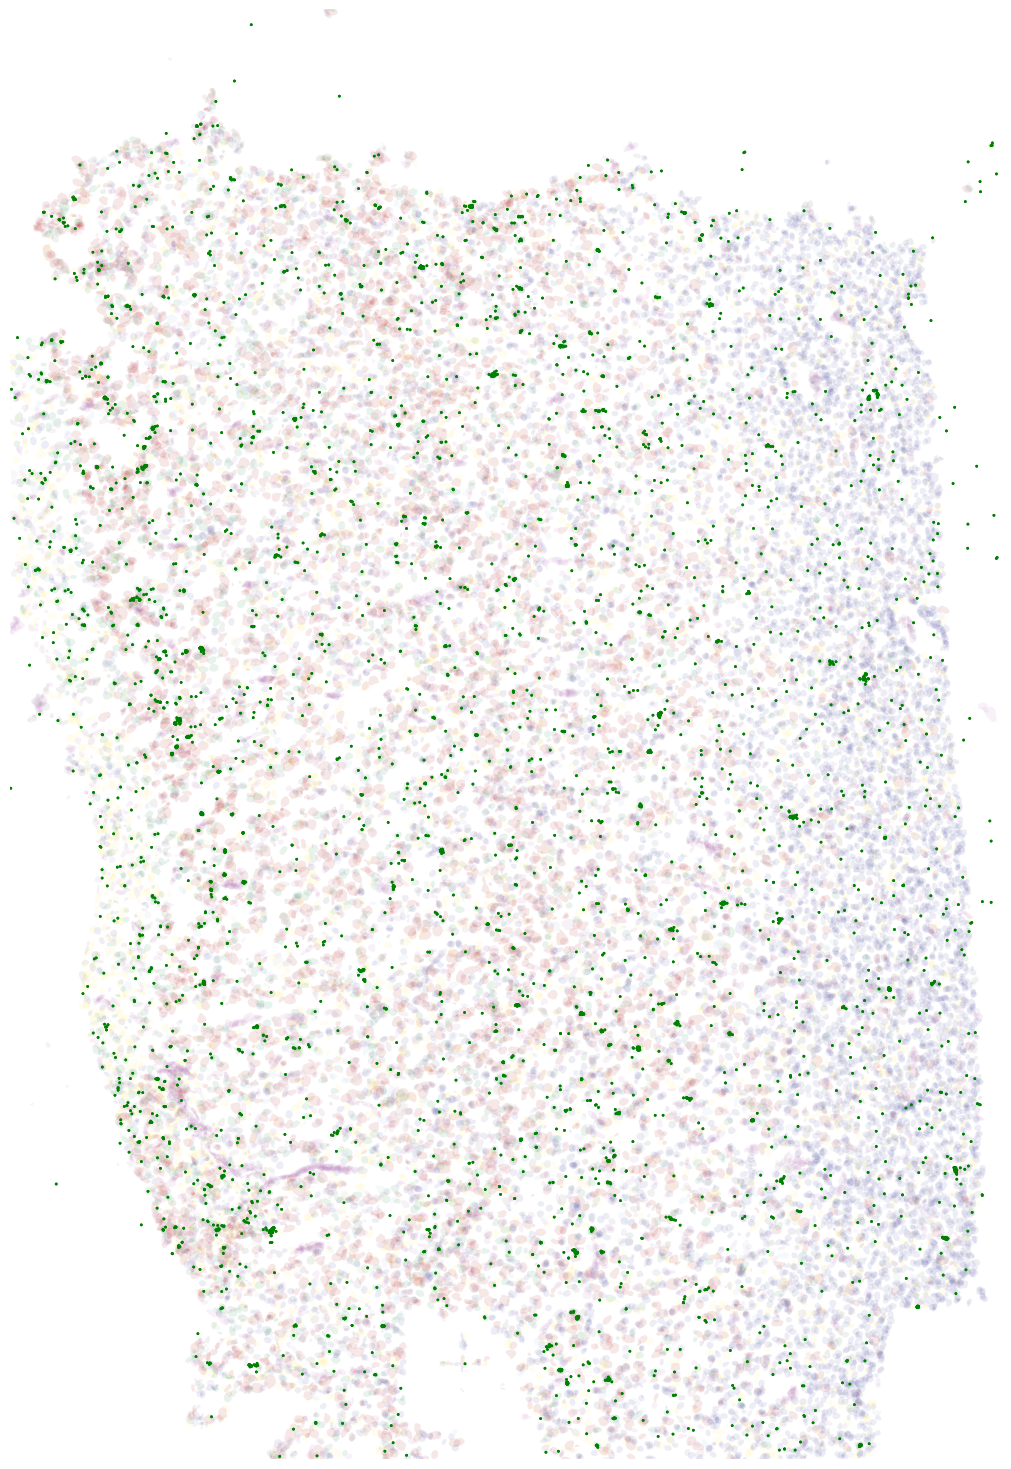

In [9]:
sdata = plot_xenium_slide('5173','SST','green','/home/ah2428/palmer_scratch/figs/fig4/')

In [12]:
crop0 = lambda x: bounding_box_query(
    x,
    min_coordinate=[5000,15000],
    max_coordinate=[10000,20000],
    axes=("x", "y"),
    target_coordinate_system="global",
)
subset = crop0(sdata)

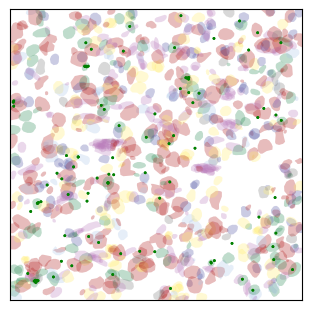

In [13]:
subset.pl.render_shapes("cell_boundaries",
                       color='celltype',
                       groups=['EXC','INH','OLI','OPC','END','AST','MIC'],
                       palette=['#b22222','#2E8B57','#5254a3','#aec7e8','#bc80bd','#ffed6f','#7f7f7f'],
                       scale=5, 
                       outline=False, 
                       fill_alpha=0.3).pl.render_points('transcripts',color='feature_name',groups='SST',palette='green',size=1).pl.show(figsize=(3,3))
plt.title('')
plt.legend('',frameon=False)
plt.title('')
plt.xticks([])
plt.yticks([])
plt.savefig('/home/ah2428/palmer_scratch/figs/fig4/SST_PTSD_inset.pdf',bbox_inches='tight',dpi=300)
plt.show()